In [1]:
%matplotlib inline
import word2vec
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE
import numpy as np

In [2]:
model = word2vec.load('../word2vec/word2vec_output.bin')

In [3]:
def tsne_plot_similar(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=[color], alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()

In [4]:
keys = ['stephen_shore', 'walker_evans', 'ansel_adams', 'julia_margaret_cameron', 'william_wegman']

embedding_clusters = []
word_clusters = []

for word in keys:
    embeddings = []
    words = []
    positions, _similarities = model.similar(word, n=30)
    for position in positions:
        words.append(model.word(position))
        embeddings.append(model.get_vector(model.word(position)))
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [20]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape

tsne_model_2d = TSNE(perplexity=30, 
                     learning_rate=750,
                     n_components=2, 
                     init='pca', 
                     n_iter=3500, 
                     random_state=32)

embeddings_2d = np.array(
    tsne_model_2d.fit_transform(
        embedding_clusters.reshape(
            n * m, k))).reshape(n, m, 2)

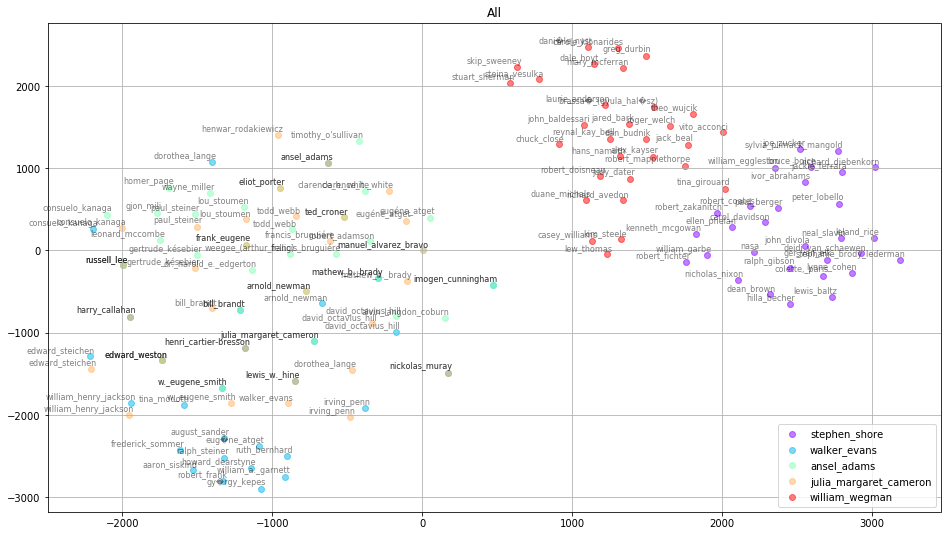

In [21]:
filename = f"{'-'.join([n.split('_')[-1] for n in keys])}.png"

tsne_plot_similar('All', keys, embeddings_2d, word_clusters, 0.5, filename)